In [2]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import scrapy
import selenium
%matplotlib inline

In [3]:
Belgian_income = pd.read_excel(r"C:\Users\natha\Desktop\Data\Data belgique\fisc2015_C_FR.xls",sheet_name="Total",skiprows=[0,1,2,3,4])
Belgian_income.columns
Belgian_income.head()


,Entités administratives,Code INS,Nombre déclarations de revenu net imposable nul,Nombre déclarations (sans revenu nul),Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Valeurs moyennes,Unnamed: 13,Unnamed: 14,Mesures de dispersion,Unnamed: 16,Asymétrie interquartile,Indice de richesse,Impôt d'Etat,Taxes communales et d'agglomération,Impôt total
0,NaN,NaN,NaN,Total,< 10.000 EUR,de 10.001 jusqu'à 20.000 EUR,de 20.001 jusqu'à 30.000 EUR,de 30.001 jusqu'à 40.000 EUR,de 40.001 jusqu'à 50.000 EUR,plus que 50.000 EUR,...,Revenu moyen par déclaration,Revenu médian par déclaration,Revenu moyen par habitant,Différence interquartile,Coefficient interquartile,NaN,NaN,NaN,NaN,NaN
1,Belgique,1000.0,590240,6289750,852717,1717200,1376213,824402,481382,1037836,...,31705,23773,17698,24596,103,25.0,100.0,4.280491e+10,3.168848e+09,4.597376e+10
2,Région flamande,2000.0,231543,3666095,447007,912494,826951,506481,298555,674607,...,33520,25412,18970,25942,102,25.0,107.0,2.725686e+10,1.957149e+09,2.921401e+10
3,Région wallonne,3000.0,218513,2025071,291261,606301,432421,252369,146845,295874,...,29677,22302,16684,22816,102,27.0,94.0,1.204378e+10,9.495033e+08,1.299329e+10
4,Communauté germanophone,3001.0,3840,42619,5795,11552,10013,5693,3447,6119,...,30749,23506,17098,22783,97,23.0,97.0,1.845234e+08,1.587155e+07,2.003950e+08


In [4]:
headers = Belgian_income.columns.tolist()

In [5]:
headers
    

['Entités administratives',
 'Code INS',
 'Nombre déclarations de revenu net imposable nul',
 'Nombre déclarations (sans revenu nul)',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9',
 "Nombre d'habitants",
 'Revenu total net imposable',
 'Valeurs moyennes',
 'Unnamed: 13',
 'Unnamed: 14',
 'Mesures de dispersion',
 'Unnamed: 16',
 'Asymétrie interquartile',
 'Indice de richesse',
 "Impôt d'Etat",
 "Taxes communales et d'agglomération",
 'Impôt total']

In [6]:
drop_features = ['Code INS',
 'Nombre déclarations de revenu net imposable nul',
 'Nombre déclarations (sans revenu nul)',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9',
"Impôt d'Etat",
"Taxes communales et d'agglomération",
'Impôt total']

In [7]:
Belgian_income=Belgian_income.rename(index=str, columns=
                      {"Unnamed: 13":"Revenu médian par déclaration","Unnamed: 14":"Revenu moyen par habitant","Unnamed: 16":"Coefficient interquartile"})


In [8]:
Belgian_income = Belgian_income.drop('0')

In [9]:
Belgian_income = Belgian_income.dropna()


In [10]:
Belgian_income

,Entités administratives,Code INS,Nombre déclarations de revenu net imposable nul,Nombre déclarations (sans revenu nul),Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Valeurs moyennes,Revenu médian par déclaration,Revenu moyen par habitant,Mesures de dispersion,Coefficient interquartile,Asymétrie interquartile,Indice de richesse,Impôt d'Etat,Taxes communales et d'agglomération,Impôt total
1,Belgique,1000.0,590240,6289750,852717,1717200,1376213,824402,481382,1037836,...,31705,23773,17698,24596,103,25.0,100.0,4.280491e+10,3.168848e+09,4.597376e+10
2,Région flamande,2000.0,231543,3666095,447007,912494,826951,506481,298555,674607,...,33520,25412,18970,25942,102,25.0,107.0,2.725686e+10,1.957149e+09,2.921401e+10
3,Région wallonne,3000.0,218513,2025071,291261,606301,432421,252369,146845,295874,...,29677,22302,16684,22816,102,27.0,94.0,1.204378e+10,9.495033e+08,1.299329e+10
4,Communauté germanophone,3001.0,3840,42619,5795,11552,10013,5693,3447,6119,...,30749,23506,17098,22783,97,23.0,97.0,1.845234e+08,1.587155e+07,2.003950e+08
5,Région de Bruxelles-Capitale,4000.0,140184,598584,114449,198405,116841,65552,35982,67355,...,27449,19088,13831,20214,106,32.0,78.0,3.504264e+09,2.621952e+08,3.766459e+09
6,Province d’Anvers,10000.0,72385,1028714,131095,257518,237041,141076,80698,181286,...,32920,24942,18565,25071,101,24.0,105.0,7.451430e+09,5.329944e+08,7.984424e+09
7,Arrondissement d’Anvers,11000.0,49400,580709,79362,148945,134649,77126,43422,97205,...,32355,24195,18177,24405,101,23.0,103.0,4.148566e+09,2.928747e+08,4.441441e+09
8,Aartselaar,11001.0,371,8094,918,1446,1841,1185,730,1974,...,39755,28837,22562,31086,108,30.0,127.0,7.973067e+07,3.943538e+06,8.367420e+07
9,Anvers,11002.0,33091,288485,42626,88225,67681,36742,19123,34088,...,28118,21679,15688,20159,93,23.0,89.0,1.649060e+09,1.315230e+08,1.780583e+09
10,Boechout,11004.0,442,7259,1034,1457,1533,907,595,1733,...,38241,27334,21613,32718,120,30.0,122.0,7.010149e+07,5.096736e+06,7.519823e+07


In [11]:
features_to_numerize=["Valeurs moyennes","Revenu médian par déclaration","Revenu moyen par habitant","Mesures de dispersion","Coefficient interquartile"]


In [12]:

Belgian_df = Belgian_income[features_to_numerize].astype(str).astype('int64')

In [13]:
Belgian_income

,Entités administratives,Code INS,Nombre déclarations de revenu net imposable nul,Nombre déclarations (sans revenu nul),Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Valeurs moyennes,Revenu médian par déclaration,Revenu moyen par habitant,Mesures de dispersion,Coefficient interquartile,Asymétrie interquartile,Indice de richesse,Impôt d'Etat,Taxes communales et d'agglomération,Impôt total
1,Belgique,1000.0,590240,6289750,852717,1717200,1376213,824402,481382,1037836,...,31705,23773,17698,24596,103,25.0,100.0,4.280491e+10,3.168848e+09,4.597376e+10
2,Région flamande,2000.0,231543,3666095,447007,912494,826951,506481,298555,674607,...,33520,25412,18970,25942,102,25.0,107.0,2.725686e+10,1.957149e+09,2.921401e+10
3,Région wallonne,3000.0,218513,2025071,291261,606301,432421,252369,146845,295874,...,29677,22302,16684,22816,102,27.0,94.0,1.204378e+10,9.495033e+08,1.299329e+10
4,Communauté germanophone,3001.0,3840,42619,5795,11552,10013,5693,3447,6119,...,30749,23506,17098,22783,97,23.0,97.0,1.845234e+08,1.587155e+07,2.003950e+08
5,Région de Bruxelles-Capitale,4000.0,140184,598584,114449,198405,116841,65552,35982,67355,...,27449,19088,13831,20214,106,32.0,78.0,3.504264e+09,2.621952e+08,3.766459e+09
6,Province d’Anvers,10000.0,72385,1028714,131095,257518,237041,141076,80698,181286,...,32920,24942,18565,25071,101,24.0,105.0,7.451430e+09,5.329944e+08,7.984424e+09
7,Arrondissement d’Anvers,11000.0,49400,580709,79362,148945,134649,77126,43422,97205,...,32355,24195,18177,24405,101,23.0,103.0,4.148566e+09,2.928747e+08,4.441441e+09
8,Aartselaar,11001.0,371,8094,918,1446,1841,1185,730,1974,...,39755,28837,22562,31086,108,30.0,127.0,7.973067e+07,3.943538e+06,8.367420e+07
9,Anvers,11002.0,33091,288485,42626,88225,67681,36742,19123,34088,...,28118,21679,15688,20159,93,23.0,89.0,1.649060e+09,1.315230e+08,1.780583e+09
10,Boechout,11004.0,442,7259,1034,1457,1533,907,595,1733,...,38241,27334,21613,32718,120,30.0,122.0,7.010149e+07,5.096736e+06,7.519823e+07


In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
x = Belgian_income["Entités administratives"]
y = Belgian_income["Revenu moyen par habitant"]

list_x = list(x)
list_y = list(y)

dict_xy = dict(zip(list_x,list_y))

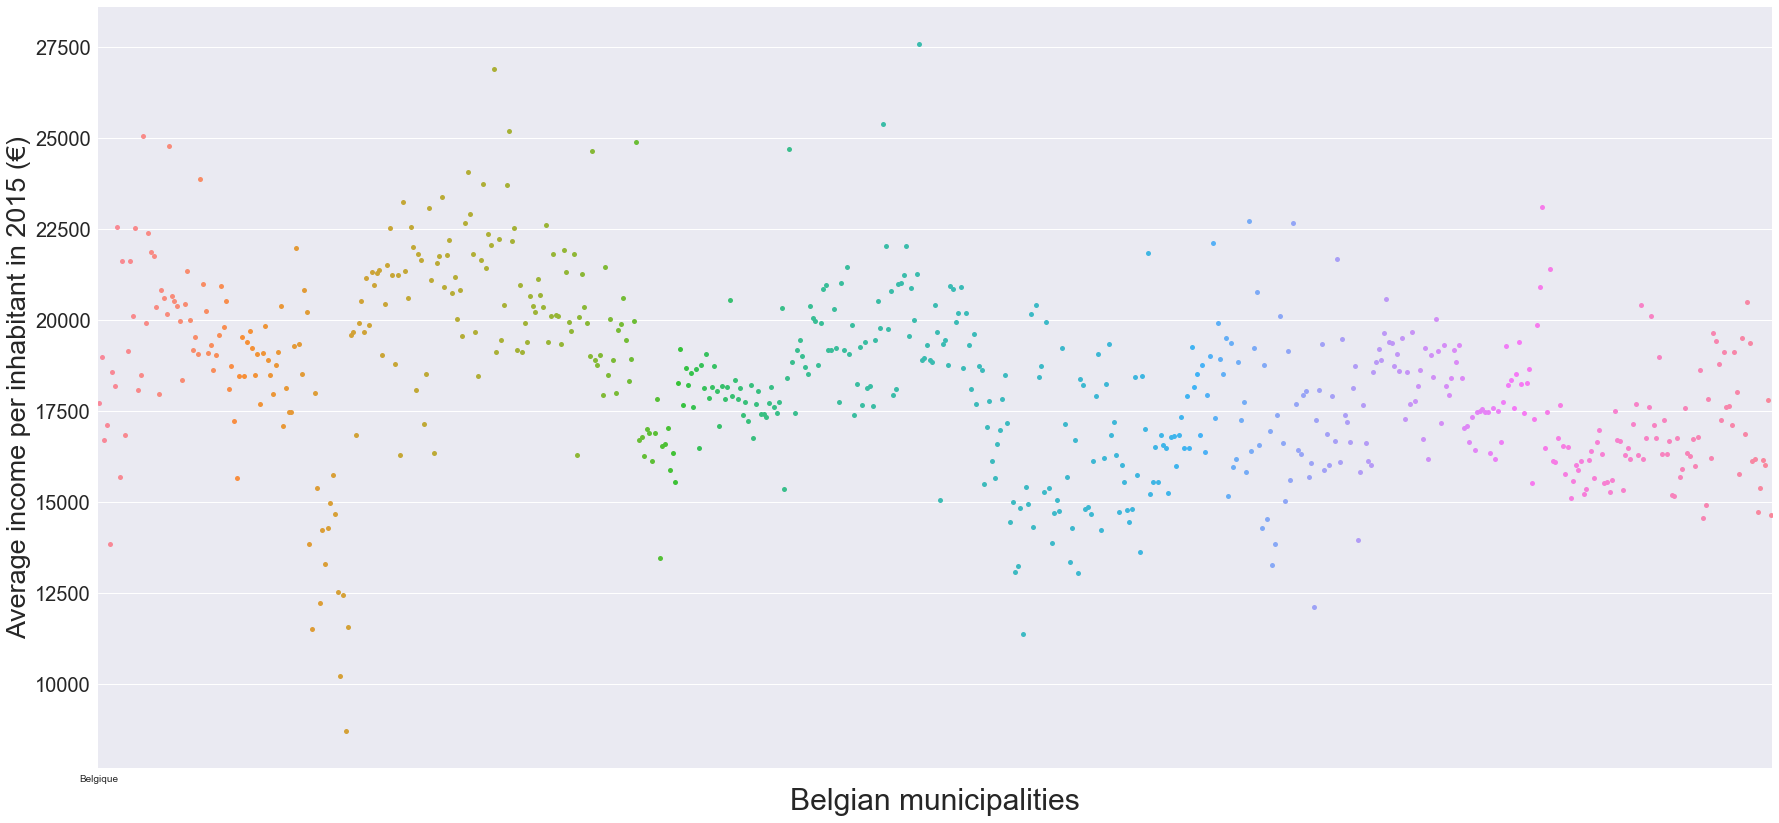

In [21]:
ax = sns.swarmplot(x,y)
sns.set(rc={'figure.figsize':(30,14)})
plt.xticks([0])
plt.xlabel('Belgian municipalities',fontsize=30)
plt.ylabel('Average income per inhabitant in 2015 (€)',fontsize=27)
plt.yticks(fontsize=20)
plt.show()

In [17]:
import bokeh
from bokeh.plotting import figure, show, output_file, output_notebook, ColumnDataSource
from bokeh.models import Jitter
from bokeh.layouts import column
from bokeh.models import PrintfTickFormatter

In [18]:
from bokeh.palettes import brewer

In [19]:
from bokeh.models import HoverTool

p = figure(x_range = list_x, y_range = (5000,30000), plot_width=1000,title="Inhabitants' average yearly income in Belgian municipalities")

output_notebook()

p.border_fill_color = "whitesmoke"
p.title.text_font = "times"
p.circle(x = list_x,y = list_y)

p.xaxis[0].formatter = PrintfTickFormatter(format= None)

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.xaxis.visible = False

tools = [('Municipality', '@x'),
        ('Average income', '@y €')]

formatter = {'Municipality' : 'printf',
            'Average income' : 'printf'}

cr = p.circle(x, y, size=6,
                fill_color="lightblue", fill_alpha=0.05, hover_fill_color="firebrick")
                 
p.add_tools(HoverTool(tooltips=tools,formatters = formatter, renderers=[cr], mode='mouse'))


Loading BokehJS ...

In [20]:
show(p)